<h1 style="text-align: center;">Introduction to Modern Mathematical Modeling with R:</h1>
<h2 style="text-align: center;">A User's Manual to Train Mathematical Consultants<br></h2>

<h3 style="text-align: center;">A Cambridge University Press book</h3>
<h3 style="text-align: center;">by SSP Shen<br><br></h3>

<p style="text-align: center;">Compiled and Edited by Joaquin Stawsky</p>
<p style="text-align: center;">Momtaza Sayd Contributed to this Version of the Code</p>
<p style="text-align: center;">San Diego State University, August 2024</p>

### Chapter 7: Probabilistic Models
### The Event-Table Method and Simulation for Two Dice

In [18]:
import numpy as np
from numpy import random as rando
import matplotlib.pyplot as plt
from scipy import integrate

In [19]:
styledict = {'xtick.labelsize':25,
             'xtick.major.size':9,
             'xtick.major.width':1,
             'ytick.labelsize':25,
             'ytick.major.size':9,
             'ytick.major.width':1,
             'legend.framealpha':0.0,
             'legend.fontsize':15,
             'axes.labelsize':20,
             'axes.titlesize':25,
             'axes.linewidth':2,
             'figure.figsize':(12,8),
             'savefig.format':'jpg'}
plt.rcParams.update(**styledict)

In [20]:
# Two-dice simulation
#Simulate 1e8 times
rolls = rando.randint(low=1, high=7, size=(int(1e8),2))
rollSums = rolls[:,0] + rolls[:,1]

# Counter for a specific event, such as "7"
place = np.where(rollSums == 7)[0]

print(f"Simulated probability that the sum of 2 dice is 7: "
      f"{place.shape[0]/rollSums.shape[0]:5.4f}")
x = 1/6
print("Calculated probability that the sum of 2 dice is 7: ", 1/6)

Simulated probability that the sum of 2 dice is 7: 0.1667
Calculated probability that the sum of 2 dice is 7:  0.16666666666666666


### Buffon’s Needle Problem

Text(0.3108897506021749, 0.2462450896615023, '$\\ell$')

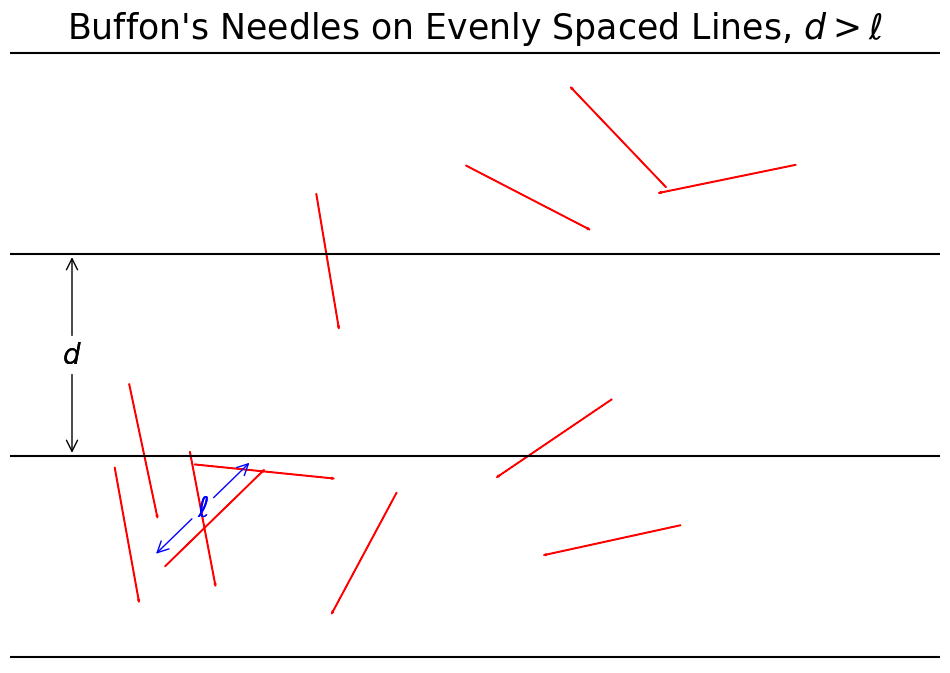

In [21]:
#Figure 7.1
d = (1/3)
l = d*(2/3)

fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.axis('off')
ax.set_title("Buffon's Needles on Evenly Spaced Lines, $d > \ell$")

ax.set_xlim(0, 1.5)
ax.set_ylim(0-1e-2, 1+1e-2)

for i in range(4):
    ax.axhline(y=i*(1/3), color='black')

for i in range(11):
    x = rando.uniform(.15, 1.35)
    y = rando.uniform(.15, .85)
    angle = rando.uniform(2*np.pi)
    endx = l*np.cos(angle)
    endy = l*np.sin(angle)
    ax.arrow(x, y, endx, endy, fc='r', ec='r')

ax.annotate("$d$", xy=(.1, 2*d), xytext=(.1, (3*d)/2), color='black',
            fontsize=20, horizontalalignment="center",
            verticalalignment="center", arrowprops={'arrowstyle':'->',
            'color':'black'})
ax.annotate("$d$", xy=(.1, d), xytext=(.1, (3*d)/2), color='black',
            fontsize=20, horizontalalignment="center",
            verticalalignment="center", arrowprops={'arrowstyle':'->',
            'color':'black'})

# Non-Random Arrow:
begin = (.25, .15)
arrowAng = np.pi/4
arrowLen = (l*np.cos(arrowAng), l*np.sin(arrowAng))
ax.arrow(*begin, *arrowLen, fc='r', ec='r')
mid = (begin[0] + arrowLen[0]/2, begin[1] + arrowLen[1]/2)
offsetAng = arrowAng + np.pi/2
nMid = (mid[0] + .025*np.cos(offsetAng), mid[1] + .025*np.sin(offsetAng))

ax.annotate("$\ell$", xy=(nMid[0] + arrowLen[0]/2, nMid[1] + arrowLen[1]/2),
            xytext=nMid, color='blue', size=20,
            horizontalalignment="center", verticalalignment="center",
            arrowprops={'arrowstyle':'->', 'color':'blue'})
ax.annotate("$\ell$", xy=(nMid[0] - arrowLen[0]/2, nMid[1] - arrowLen[1]/2),
            xytext=nMid, color='blue', size=20,
            horizontalalignment="center", verticalalignment="center",
            arrowprops={'arrowstyle':'->', 'color':'blue'})

# plt.savefig("IllustrationofBuffonsNeedleProblem.jpg", bbox_inches='tight')

### The Short Needle Problem: l < d

Text(-0.15, 2, '$d$ = 2')

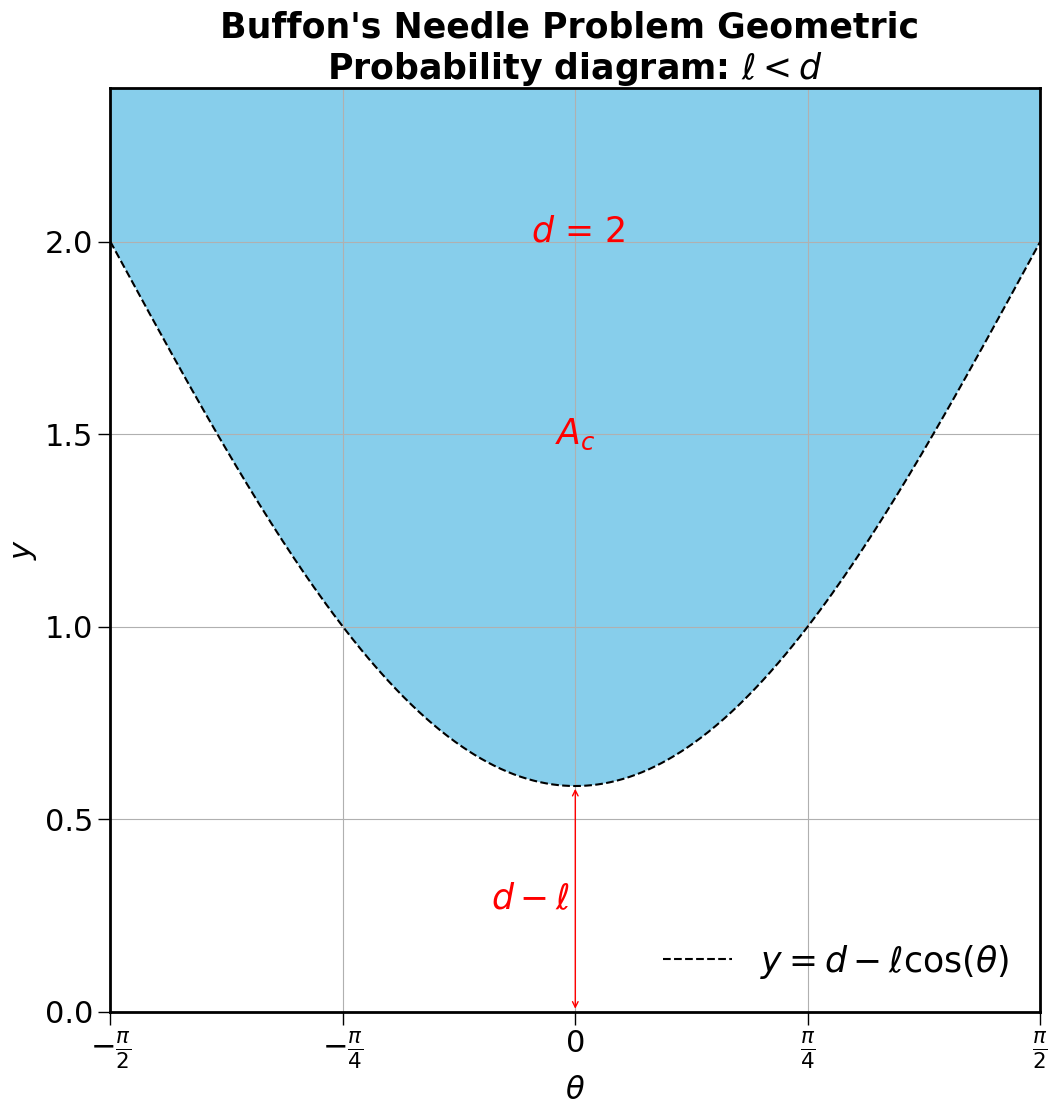

In [22]:
d = 2
l = np.sqrt(d)
x = np.linspace(-np.pi/2, np.pi/2, 1001)
buff = d-l*np.cos(x)


#Figure 7.3
fig, ax = plt.subplots(1,1,figsize=(12,12));

ax.plot(x, buff, 'k--', label=r"$y = d-\ell\cos(\theta)$")

ax.set_xlim(-0.5*np.pi, 0.5*np.pi)
ax.set_ylim(0, d+0.4)
ax.set_title("Buffon's Needle Problem Geometric \nProbability diagram: $\ell < d$"
            ,fontweight="bold")
ax.fill_between(x, buff, 4*np.ones(x.size), fc='skyblue')

ax.set_xlabel(r"$\theta$",size=22)
ax.set_xticks([(np.pi/4)*i for i in range(-2, 3)])
ax.set_xticklabels([r"$-\frac{\pi}{2}$", r"$-\frac{\pi}{4}$","0",
                    r"$\frac{\pi}{4}$", r"$\frac{\pi}{2}$"])

ax.set_ylabel("$y$",size=22)
ax.text(0, 1.5, "$A_{c}$", size=25, color='red',
            horizontalalignment="center", verticalalignment="center")
ax.legend(loc='lower right', fontsize=25)
ax.grid()
ax.tick_params(labelsize=22)
ax.annotate("", xy=(0,0), xytext=(0, d-l),
            arrowprops={'arrowstyle':'<->', 'color':'red'})
ax.text(-.15, (d-l)/2, "$d-\ell$", size=25, color='red',
            horizontalalignment="center", verticalalignment="center")
ax.text(-.15,2,"$d$ = 2",color='red',size=25)

#plt.savefig("GeometricProbabilityofBuffonsShortNeedle.jpg")

### The Long Needle Problem: l > d

Text(-0.7853981633974483, 1.5, '$A_C$')

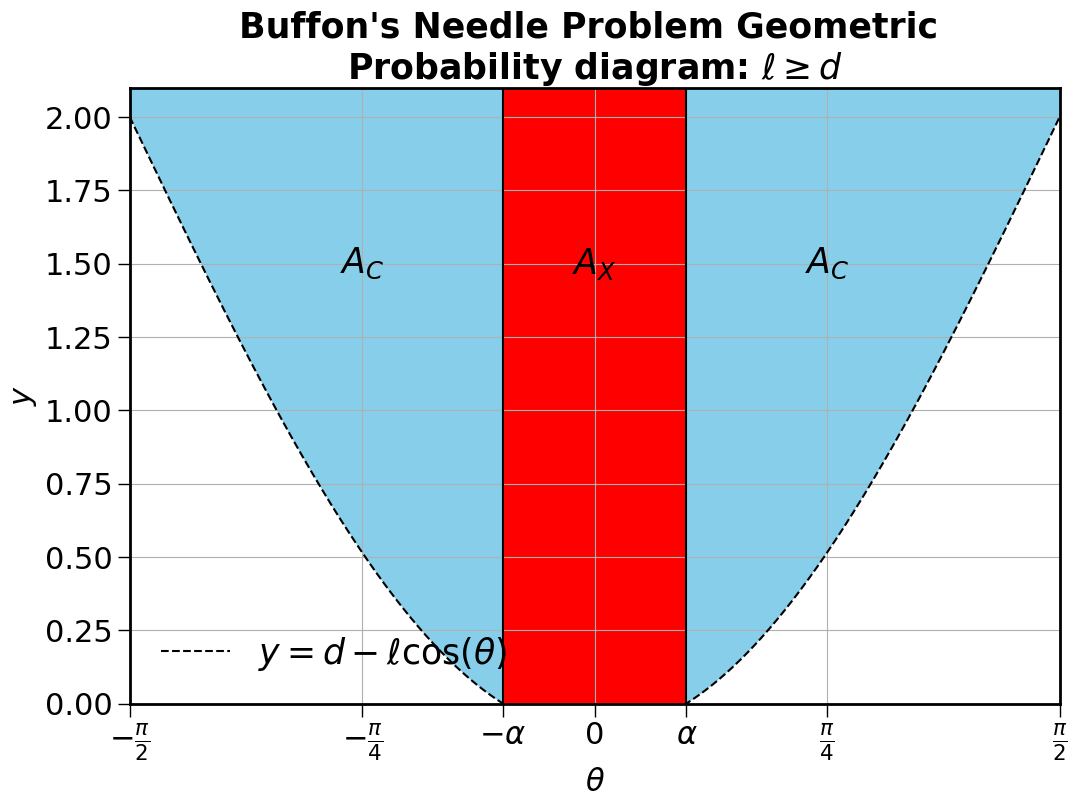

In [23]:
d = 2
l = d +.1
alpha = np.arccos(d/l)
buff2 = d-l*np.cos(x)

cross = [True if -alpha <= i <= alpha else False for i in x]
cond = [True if i is False else False for i in cross]

#Figure 7.5
fig, ax = plt.subplots(1,1,figsize=(12,8));

ax.plot(x, buff2, 'k--', label=r"$y = d-\ell\cos(\theta)$")
ax.axvline(x=-alpha, color='k')
ax.axvline(x=alpha, color='k')

ax.set_xlim(-0.5*np.pi, 0.5*np.pi)
ax.set_ylim(0, d+.1)
ax.set_title("Buffon's Needle Problem Geometric \nProbability diagram: $\ell \geq d$"
            ,fontweight="bold")
ax.fill_between(x, buff2, 4*np.ones(x.size), where=cross, fc='red')
ax.fill_between(x, buff2, 4*np.ones(x.size), where=cond, fc='skyblue')

ax.set_xlabel(r"$\theta$",size=22)
ax.set_xticks([-np.pi/2, -np.pi/4, -alpha, 0, alpha, np.pi/4, np.pi/2])
ax.set_xticklabels([r"$-\frac{\pi}{2}$", r"$-\frac{\pi}{4}$", r"$-\alpha$","0",
                    r"$\alpha$", r"$\frac{\pi}{4}$", r"$\frac{\pi}{2}$"]);
ax.set_ylabel("$y$",size=22)
ax.tick_params(labelsize=22)
ax.grid()
ax.legend(loc='lower left', fontsize=25)

ax.text(0, 1.5, "$A_X$", size=25, color='k',
            horizontalalignment="center", verticalalignment="center")
ax.text(np.pi/4, 1.5, "$A_C$", size=25, color='k',
            horizontalalignment="center", verticalalignment="center")
ax.text(-np.pi/4, 1.5, "$A_C$", size=25, color='k',
            horizontalalignment="center", verticalalignment="center")

#plt.savefig("GeometricProbabilityofBuffonsLongNeedle.jpg")


### Computer Simulation of the Buffon’s Needle Problem

In [24]:
d = 2
l = 4 # Long Needle
n = 10_000
ys = rando.uniform(low=0, high=d, size=(n,1))
thetas = rando.uniform(low=-np.pi/2, high=np.pi/2, size=(n,1))
res = ys + l*np.cos(thetas)
k = len(np.where(res >= d)[0])

print(f"Probability of Needle Crossing by simulation: {k/n}")
print(f"Probability of Needle Crossing by derived formula: "
      f"{(2/(np.pi*d))*(np.arccos(d/l)*d + l - np.sqrt(l**2 - d**2))}")

Probability of Needle Crossing by simulation: 0.8317
Probability of Needle Crossing by derived formula: 0.8372484205582451


In [25]:
d = 4
l = 2 # Short Needle
n = 10_000
ys = rando.uniform(low=0, high=d, size=(n,1))
thetas = rando.uniform(low=-np.pi/2, high=np.pi/2, size=(n,1))
res = ys + l*np.cos(thetas)
k = len(np.where(res >= d)[0])

print(f"Probability of Needle Crossing by simulation: {k/n}")
print(f"Probability of Needle Crossing by derived formula: {(2*l)/(np.pi*d)}")

Probability of Needle Crossing by simulation: 0.3171
Probability of Needle Crossing by derived formula: 0.3183098861837907


### User Monte Carlo Simulation to Estimate the Volume of an n-ball

In [26]:
coords = rando.uniform(low=-1, high=1, size=(10_000, 2))
reds = [i for (i, point) in enumerate(coords) if np.linalg.norm(point, 2) <= 1]

In [27]:
# approximate value of pi
print(4*len(reds)/len(coords[:,0]))

3.1556


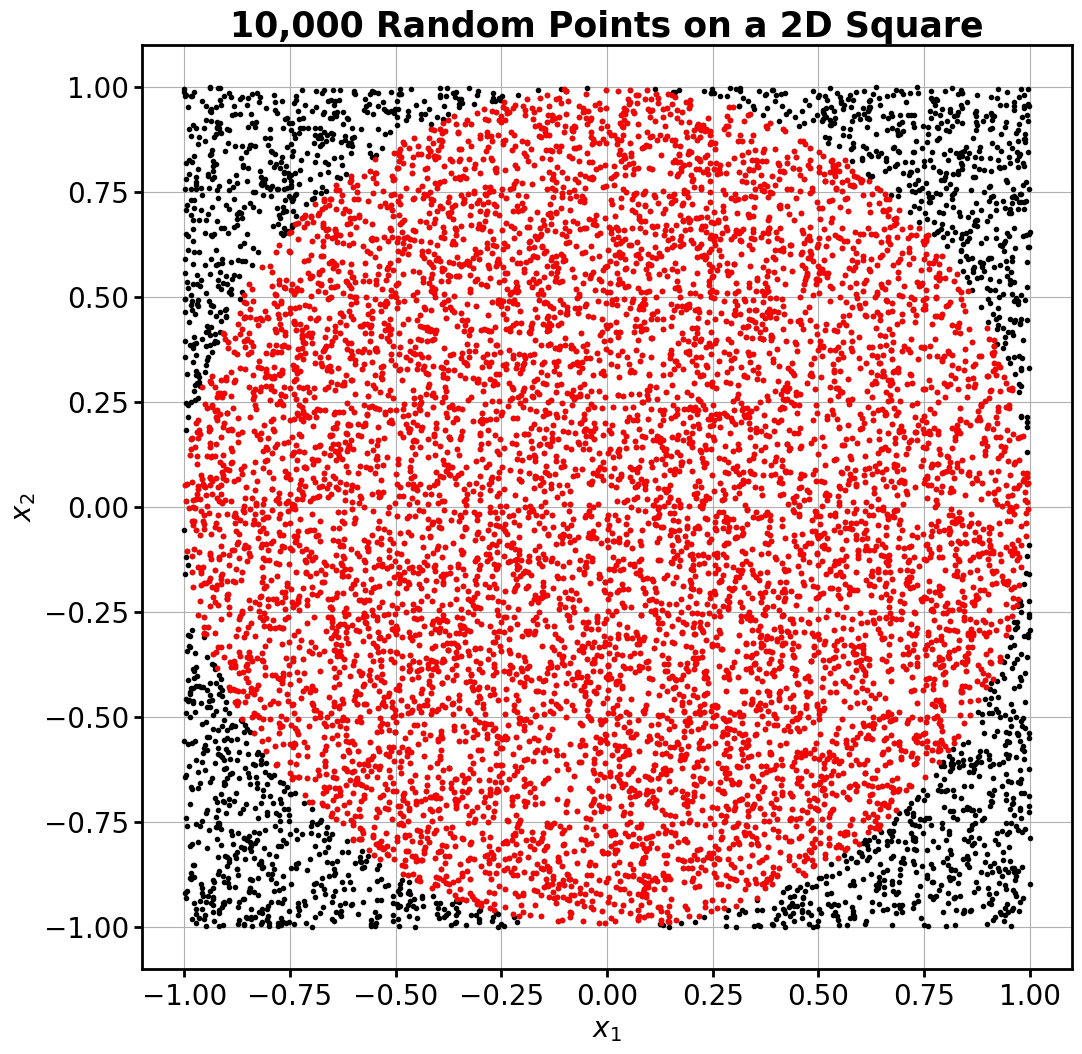

In [28]:
# Figure 7.6
fig, ax = plt.subplots(1,1, figsize=(12,12))
ax.plot(coords[:,0], coords[:,1], 'k.')
ax.plot(coords[reds,0], coords[reds,1], 'r.')
ax.set_title("10,000 Random Points on a 2D Square", size=25
            ,fontweight="bold")
ax.set_xlabel("$x_1$", size=20)
ax.set_ylabel("$x_2$", size=20)
ax.tick_params(length=6, width=2, labelsize=20)
ax.grid()

#plt.savefig("10kRandomPoints.jpg")